Populating the interactive namespace from numpy and matplotlib


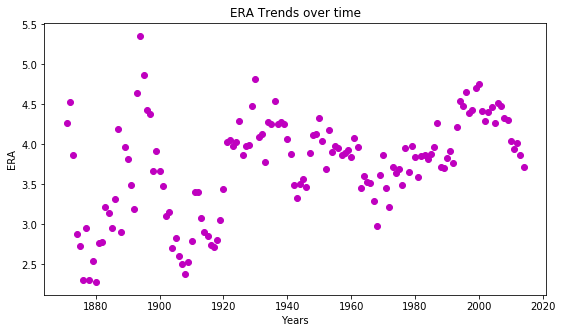

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn import mixture
from matplotlib.patches import Ellipse

%pylab inline
Teams_data = pd.read_csv('Teams.csv', header = None).as_matrix()
yearID = Teams_data[1:,0]
ERA = Teams_data[1:,28]
yearID = [int(i) for i in yearID]
ERA = [float(j) for j in ERA]
ERA1 = np.zeros(144)
years = np.zeros(144)

for i in range(144):
    years[i] = 1871+i
    
c = 0
c1 = 0
f = 1871
sum = 0
for i in range(2805):
    if yearID[i]==f:
        sum += ERA[i]
        c1 += 1
    else:
        ERA1[c] = sum/c1
        c1 = 0
        c += 1
        f += 1
        i -= 1
        sum = 0
        
plt.figure(figsize = (9,5))
plt.scatter(years, ERA1, c='m', alpha = 1, marker = 'o')
plt.title('ERA Trends over time')
plt.xlabel('Years')
plt.ylabel('ERA')

/Users/ashx/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


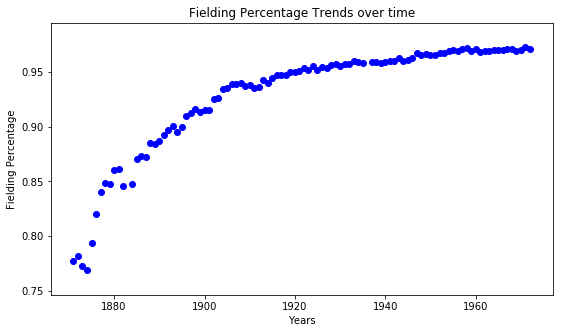

In [9]:
field_data = pd.read_csv('Fielding.csv', header = None).as_matrix()
yearID = field_data [1:, 1]
outs = field_data [1:, 9]
errors = field_data [1:, 11]
yearID = [int(i) for i in yearID]
errors = [float(j) for j in errors]
outs = [float(k) for k in outs]

avg_field = np.zeros(144)
year_outs = 0
year_errors = 0
f = 1871
counter1 = 0

for i in range (170526):
    if (yearID[i] == f):
        year_outs = year_outs + outs[i]
        year_errors = year_errors + errors[i]
    else:
        if (year_outs + year_errors != 0): 
            avg_field[counter1] = year_outs/(year_outs+year_errors)
        else:
            avg_field[counter1] = 0
        counter1 += 1
        year_outs = 0
        year_errors = 0
        f += 1
        i -= 1
        
plt.figure(figsize = (9,5))
plt.scatter(years, avg_field, c='b', alpha = 1, marker = 'o')
plt.title('Fielding Percentage Trends over time')
plt.xlabel('Years')
plt.ylabel('Fielding Percentage')


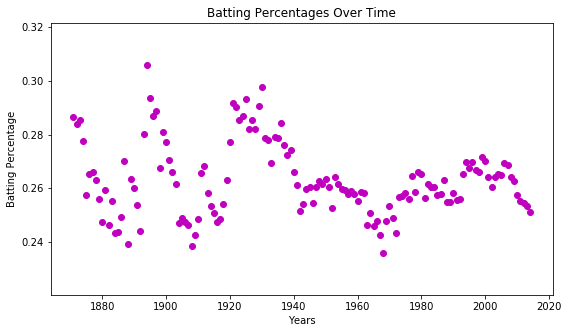

In [4]:
batting_data = pd.read_csv('Teams.csv', header = None).as_matrix()
yearID = batting_data[1:,0]
atBat = batting_data[1:,15]
hits = batting_data[1:, 16]
yearID = [int(i) for i in yearID]
atBat = [int(j) for j in atBat]
hits = [int(k) for k in hits]

percentages = np.zeros(144)


    
c = 0
c1 = 0
f = 1871
sum_atbat = 0
sum_hits = 0
for i in range(2805):
    if yearID[i]==f:
        sum_atbat += atBat[i]
        sum_hits += hits[i]
    else:
        percentages[c] = sum_hits/sum_atbat
        c += 1
        f += 1
        i -= 1
        sum_hits = 0
        sum_atbat = 0
        
plt.figure(figsize = (9,5))
plt.scatter(years, percentages, c='m', alpha = 1, marker = 'o')
plt.title('Batting Percentages Over Time')
plt.xlabel('Years')
plt.ylabel('Batting Percentage')

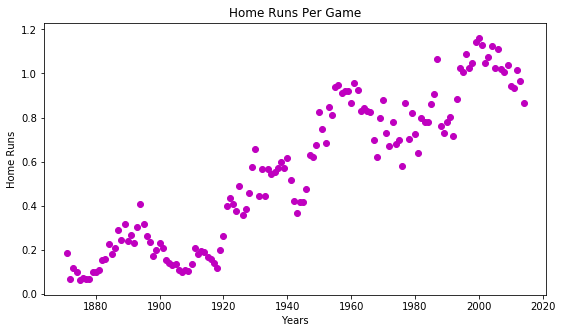

In [6]:
homerun_data = pd.read_csv('Teams.csv', header = None).as_matrix()
yearID = batting_data[1:,0]
homerun = batting_data[1:,19]
games = batting_data[1:, 6]
yearID = [int(i) for i in yearID]
homerun = [int(j) for j in homerun]
games = [int(k) for k in games]

homerunpergame = np.zeros(144)

c = 0
c1 = 0
f = 1871
sum_homeruns = 0
sum_games = 0
for i in range(2805):
    if yearID[i]==f:
        sum_homeruns += homerun[i]
        sum_games += games[i] 
    else:
        homerunpergame[c] = sum_homeruns/sum_games
        c += 1
        f += 1
        i -= 1
        sum_homeruns = 0
        sum_games = 0
        
plt.figure(figsize = (9,5))
plt.scatter(years, homerunpergame, c='m', alpha = 1, marker = 'o')
plt.title('Home Runs Per Game')
plt.xlabel('Years')
plt.ylabel('Home Runs')

/Users/ashx/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ashx/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ashx/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ashx/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: Dep

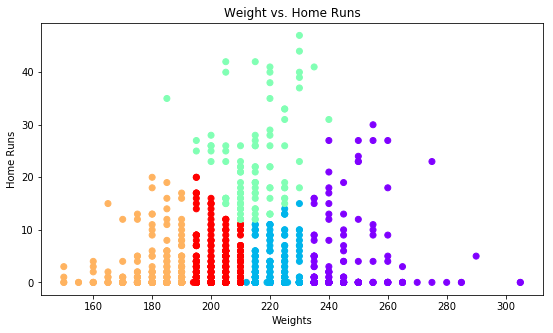

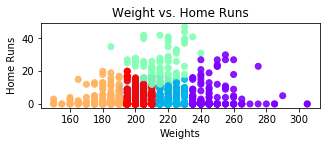

In [100]:
from numpy import *
batting_data = pd.read_csv('Batting.csv', header = None).as_matrix()
ids = batting_data[99847:,0]
hr = batting_data[99847:,11]
master_data = pd.read_csv('Master.csv', header = None).as_matrix()
master_id = master_data[1:,0]
master_w = master_data[1:,16]
master_h = master_data[1:,17]

matched_weights = []
for i in range(len(master_w)):
    if master_w[i] != master_w[i]:
        master_w[i] = 0
found = 0
for j in range(len(ids)):
    for i in range(len(master_id)):
        if (ids[j] == master_id[i]):
            matched_weights.append(int(master_w[i]))
            found = 1
    if found == 0:
        matched_weights.append(0)
    found = 0

X = np.column_stack((matched_weights, hr))

# Kmeans clustering

from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=5, n_init=100)
kmeans.fit(X)

plt.figure(figsize = (9,5))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_,cmap=cm.rainbow)
plt.title('Weight vs. Home Runs')
plt.xlabel('Weights')
plt.ylabel('Home Runs')

# GMM clustering

figure(figsize = (5,5))
ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap=cm.rainbow, alpha=0.9)
plt.title('Weight vs. Home Runs')
plt.xlabel('Weights')
plt.ylabel('Home Runs')
gmm = mixture.GMM(n_components=2) # performs GMM clustering on the dataset
gmm.fit(X)
for n in arange(2): 
    v, w = np.linalg.eigh(gmm._get_covars()[n][:2,:2])
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    if True:
        a = 2*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], 180+angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

/Users/ashx/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


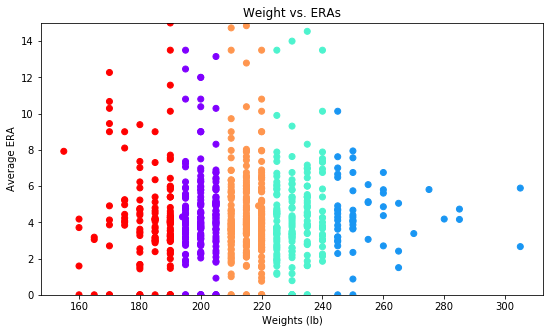

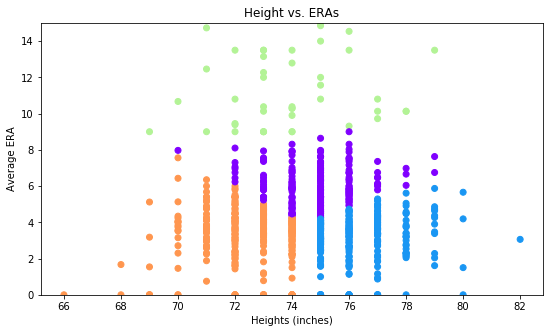

In [122]:
p_data = pd.read_csv('Pitching.csv', header = None).as_matrix()
p_ids = p_data[43331:,0]
eras = p_data[43331:,19]
matched_weights = []
matched_heights = []
found = 0
for i in range(len(eras)):
    if eras[i] != eras[i]:
        eras[i] = 0
for j in range(len(p_ids)):
    for i in range(len(master_id)):
        if (p_ids[j] == master_id[i]):
            matched_weights.append(int(master_w[i]))
            found = 1
    if found == 0:
        matched_weights.append(0)
    found = 0
    
for j in range(len(p_ids)):
    for i in range(len(master_id)):
        if (p_ids[j] == master_id[i]):
            matched_heights.append(int(master_h[i]))
            found = 1
    if found == 0:
        matched_weights.append(0)
    found = 0

X = np.column_stack((matched_weights, eras))
Y = np.column_stack((matched_heights, eras))

from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=6, n_init=100)
kmeans.fit(X)

plt.figure(figsize = (9,5))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_,cmap=cm.rainbow)
pylab.ylim([0,15])
plt.title('Weight vs. ERAs')
plt.xlabel('Weights (lb)')
plt.ylabel('Average ERA')

kmeans.fit(Y)

plt.figure(figsize = (9,5))
plt.scatter(Y[:,0], Y[:,1], c=kmeans.labels_,cmap=cm.rainbow)
pylab.ylim([0,15])
plt.title('Height vs. ERAs')
plt.xlabel('Heights (inches)')
plt.ylabel('Average ERA')

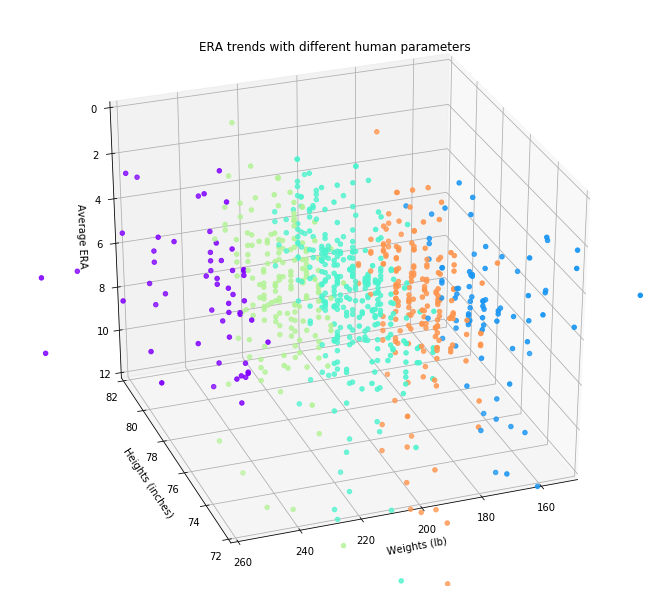

In [149]:
from mpl_toolkits.mplot3d import Axes3D
Z = np.column_stack((matched_weights, matched_heights, eras))
kmeans = KMeans(init='random', n_clusters=6, n_init=100)
kmeans.fit(Z)
fig = plt.figure(figsize=(9,8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=kmeans.labels_,cmap=cm.rainbow)
ax.set_zlim3d([0,12])
ax.set_xlim3d([150, 260])
ax.set_ylim3d([72, 82])
ax.set_title('ERA trends with different human parameters')
ax.set_xlabel("Weights (lb)");
ax.set_ylabel("Heights (inches)");
ax.set_zlabel("Average ERA");

/Users/ashx/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


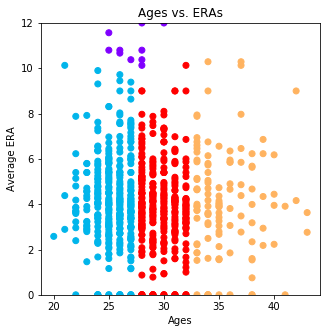

In [160]:
#age vs. ERA
p_data = pd.read_csv('Pitching.csv', header = None).as_matrix()
p_ids = p_data[43331:,0]
eras = p_data[43331:,19]
master_data = pd.read_csv('Master.csv', header = None).as_matrix()
master_id = master_data[1:,0]
birth_years = master_data[1:, 1]
ages = []
new_era = []

for i in range(len(eras)):
    if eras[i] != eras[i]:
        eras[i] = 0
for i in range(len(birth_years)):
    if birth_years[i] != birth_years[i]:
        birth_years[i] = 0

for j in range(len(p_ids)):
    for i in range(len(master_id)):
        if (p_ids[j] == master_id[i]):
            ages.append((2015 - int(birth_years[i])))
            #new_era.append(int(eras[j]))
            found = 1
    if found == 0:
        matched_weights.append(0)
    found = 0

X = np.column_stack((ages, eras))

kmeans = KMeans(init='random', n_clusters=5, n_init=100)
kmeans.fit(X)

plt.figure(figsize = (5,5))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_,cmap=cm.rainbow)
pylab.ylim([0,12])
plt.title('Ages vs. ERAs')
plt.xlabel('Ages')
plt.ylabel('Average ERA')

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,whiten=True)
b = pca.fit(Z)
s = pca.score(Z)
print(s)

-13.5632380801


In [176]:
kmeans = KMeans(init='random', n_clusters=6, n_init=100)
kmeans.fit(Z)
labels = kmeans.labels_

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(20)
clf.fit(Z,labels)
s1 = clf.score(Z,labels)
print(s1)

0.992583436341


In [178]:
from sklearn.naive_bayes import GaussianNB
clf_pf = GaussianNB()
clf_pf.fit(Z,labels)
s2 = clf_pf.score(Z,labels)
print(s2)

0.987639060569


In [180]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA().fit(Z, labels)
s3 = qda.score(Z,labels)
print(s3)

0.991347342398


In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(Z,labels)
s4 = lda.score(Z,labels)
print(s4)

0.975278121137


/Users/ashx/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [185]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
z = t.fit(Z,labels)
s5 = z.score(Z,labels)
print(s5)

1.0


In [187]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier(n_estimators=2,max_depth=3).fit(Z,labels)
s6 = r.score(Z,labels)
print(s6)

0.875154511743


In [188]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Z,labels)
print(lr.score(Z,labels))

0.766378244747
